# Some statistical analysis and machine learning basics from my course in SUTD

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

def get_metrics(actual_targets, predicted_targets, labels):
    
    c_matrix = confusion_matrix(actual_targets, predicted_targets, labels)
    output = {}
    tn,fp,fn,tp = c_matrix.ravel()
    #tn n and n
    #fp p but n
    #fn n but p
    #tp p and p
    output['confusion matrix'] = c_matrix
    output['total records'] = len(actual_targets)
    output['accuracy'] = round((tn+tp)/(tn+fp+fn+tp),3)
    output['sensitivity'] = round((tp)/(tp+fn), 3)
    output['false positive rate'] = round((fp)/(tn+fp),3)
    
    return output

In [4]:
import numpy as np

def five_number_summary(x):
    if x.ndim != 2:
        return None
    else:
        output_final = []
        for i in range(x.shape[1]):
            column = x[:,i]
            output = {'minimum': np.min(column),'first quartile': np.percentile(column,25),'median': np.median(column),'third quartile': np.percentile(column, 75),'maximum': np.max(column)}
            output_final.append(output)
    
    return output_final

In [5]:
import numpy as np

def normalize_minmax(data):
    size = data.shape
    if (len(size) == 1):
        return None
    else:
        cols = size[1]
        
    for c in range(cols):
        maximum = np.max(data[:,c])
        minimum = np.min(data[:,c])
        denom = maximum - minimum
        data[:,c] = (data[:,c] - minimum)/denom
        
    return data

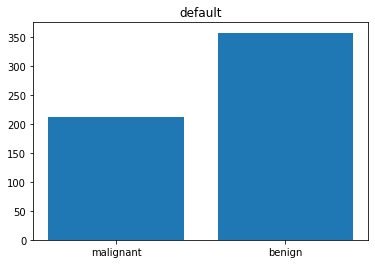

{'confusion matrix': array([[141,   5],
       [  9,  73]], dtype=int64), 'total records': 228, 'accuracy': 0.939, 'sensitivity': 0.89, 'false positive rate': 0.034}


In [9]:
from sklearn.model_selection import train_test_split 
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# place any functions you need from CS1-3 here

def get_metrics(actual_targets, predicted_targets, labels):
    c_matrix = confusion_matrix(actual_targets, predicted_targets, labels)
    output = {}
    tn,fp,fn,tp = c_matrix.ravel()
    output['confusion matrix'] = c_matrix
    output['total records'] = len(actual_targets)
    output['accuracy'] = round((tn+tp)/(tn+fp+fn+tp),3)
    output['sensitivity'] = round((tp)/(tp+fn), 3)
    output['false positive rate'] = round((fp)/(tn+fp),3)
    return output

def five_number_summary(x):
    if x.ndim != 2:
        return None
    else:
        output_final = []
        for i in range(x.shape[1]):
            column = x[:,i]
            output = {'minimum': np.min(column),'first quartile': np.percentile(column,25),'median': np.median(column),'third quartile': np.percentile(column, 75),'maximum': np.max(column)}
            output_final.append(output)
    
    return output_final

def normalize_minmax(data):
    size = data.shape
    if (len(size) == 1):
        return None
    else:
        cols = size[1]
    for c in range(cols):
        maximum = np.max(data[:,c])
        minimum = np.min(data[:,c])
        denom = maximum - minimum
        data[:,c] = (data[:,c] - minimum)/denom
    return data

def display_bar_chart(positions, counts, names, title_name = 'default'):
    plt.bar(positions, counts, align = 'center')
    plt.xticks(np.arange(2), names)
    plt.title(title_name)
    plt.show()

def knn_classifier(bunchobject, feature_list, size, seed , k ): 
    data = bunchobject.data[:, feature_list]
    tar = bunchobject.target
    norm_data = normalize_minmax(data)
    d_train, d_test, tar_train, tar_test = train_test_split(data, tar, test_size = size, random_state = seed)
    c = neighbors.KNeighborsClassifier(k)
    c.fit(d_train, tar_train)
    tar_pre = c.predict(d_test)
    return get_metrics(tar_test, tar_pre, [1,0])
    
    
bunchobject = datasets.load_breast_cancer()
unique, counts = np.unique(bunchobject.target, return_counts = True)
display_bar_chart(unique, counts, bunchobject.target_names)

features = range(20)
results = knn_classifier(bunchobject, features, 0.40, 2752, 3)
print(results)

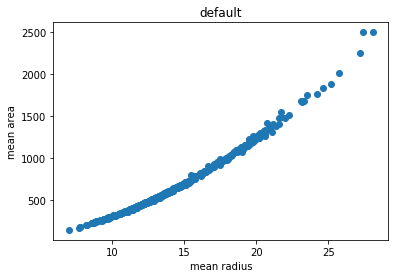

In [4]:
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def display_scatter(x, y, xlabel = 'x', ylabel = 'y', title_name = 'default'):
    plt.scatter(x ,y )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_name)
    plt.show()
    

    
bunchobject = datasets.load_breast_cancer()
    
x_index = 0
y_index = 3

x = bunchobject.data[:,[x_index]]
y = bunchobject.data[:, [y_index]]

x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]

display_scatter(x,y,x_label,y_label)
    

{'coefficients': array([[100.16755386]]), 'intercept': array([-760.52027342]), 'mean squared error': 2631.2988797244757, 'r2 score': 0.9777253933521517}


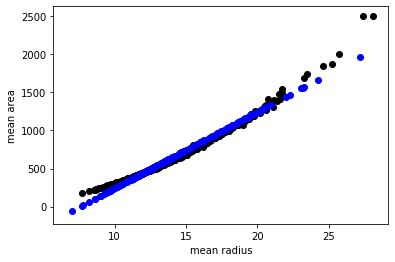

In [9]:
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.colors import ListedColormap

def plot_linear_regression(x1, y1, x2, y2, x_label = '', y_label = ''):
    plt.scatter(x1, y1, color = 'black')
    plt.scatter(x2, y2, color = 'blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def linear_regression(bunchobject, x_index, y_index, size, seed):
    data = bunchobject.data
    x = data[:, [x_index]]
    y = data[:, [y_index]]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = size, random_state = seed)
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    var = r2_score(y_test, y_pred)
    
    results = {'coefficients': regr.coef_,
               'intercept': regr.intercept_,
               'mean squared error': mse,
               'r2 score': var }
    # if mean squared error is small -> little error
    # if r2 score close to 1 -> linear regression can be used for this data set
    return x_train, y_train, x_test, y_pred, results

bunchobject = datasets.load_breast_cancer()

x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject, 0, 3, 0.4, 2752)
print(results)
plot_linear_regression(x_train, y_train, x_test, y_pred,
                      bunchobject.feature_names[0],
                      bunchobject.feature_names[3])

In [11]:
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def multiple_linear_regression(bunchobject, x_index, y_index, order, size, seed):
    #load dataset
    data = bunchobject.data
    
    #extract features to train on
    x = data[:, [x_index]]
    y = data[:, [y_index]]
    
    pol = PolynomialFeatures(order, include_bias = False)
    c = pol.fit_transform(x) # creates columns based on the order e.g. order 2 creates column of x^2
    
    #split dataset
    c_train, c_test, y_train, y_test = train_test_split(c, y, test_size = size, random_state = seed)
    
    regr = linear_model.LinearRegression()
    regr.fit(c_train, y_train)
    y_pred = regr.predict(c_test)
    
    mse = mean_squared_error(y_test, y_pred)
    var = r2_score(y_test, y_pred)
    
    results = {'coefficients': regr.coef_,
               'intercept': regr.intercept_,
               'mean squared error': mse,
               'r2 score': var }
    return c_train[:,[0]], y_train, c_test[:,[0]], y_pred, results